## Randomly Generating a Citation Network in Python

In [64]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import random

To define a citation graph I start by creating a function to define the adjacency matrix of the graph using the following properties:
  * citations represent a *binary relation* from node to node
  * citations are unidirectional which implies the matrix is *asymmetric*
  * the citation graph is *acyclic*

The result is a function that randomly generated a *binary upper-triangular* adjacency matrix that shows the relation from node i to node j of dimension n

In [65]:
def randomGraph(n):
    M_lists = []
    for i in range(n):
        M_list = []
        for j in range(n):
            if i < j:
                M_list.append(random.choice([0,1]))
            else:
                M_list.append(0)
        M_lists.append(M_list)
    
    A = np.matrix(M_lists)
    
    return A

The next two functions define the cocitation and bibliographic coupling matrix respectively.
```python
cocitation matrix = dot(A,A_T)
bibliographic matrix = dot(A_T,A)
```

In [66]:
def cocitationGraph(A):
    A_T = np.transpose(A)
    cocitation_matrix = np.dot(A,A_T)
    CC = nx.Graph(cocitation_matrix)

    return CC


def bibliographicGraph(A):
    A_T = np.transpose(A)
    bibliographic_matrix = np.dot(A_T,A)
    BC = nx.Graph(bibliographic_matrix)

    return BC

Here is a quick example of how I use these functions to quickly generate a graph within only 3 lines of code; for brevity, I limited the dimension of the adjacency matrix to 10 but you are more than welcome to create a far more complex network

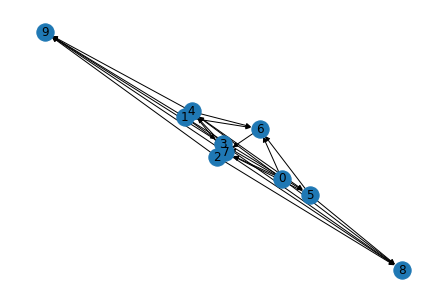

In [67]:
A = randomGraph(10)
C = nx.DiGraph(A)
nx.draw(C,with_labels=True)

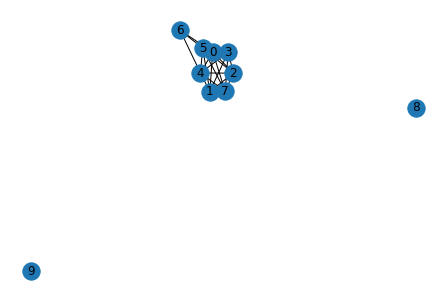

In [68]:
CC = cocitationGraph(A)
nx.draw(CC,with_labels=True)